In [17]:
url = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/rate_23.json'
url2 = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/data_23.csv'

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

데이터 : data_23.csv

In [21]:
data = pd.read_csv(url2,header=None).to_numpy()
x,y = data[:,:-1], data[:,-1]

시각화

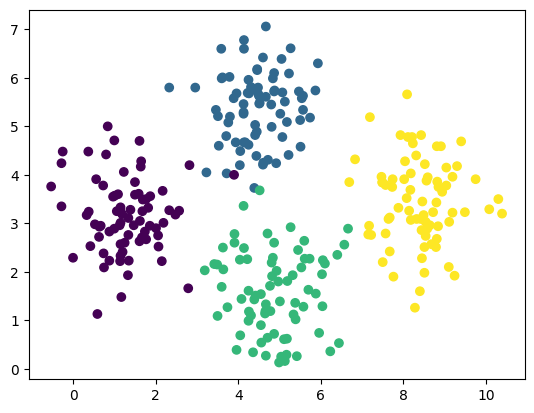

In [27]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

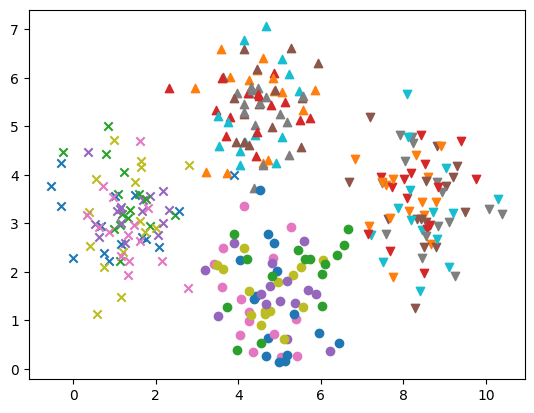

In [39]:
markers = "x^ov"
markinglist = [markers[int(i)] for i in y]
for i in range(len(x)):
  plt.scatter(x[i,0],x[i,1],marker= markinglist[i])
plt.show()

파이퍼 파라메터

In [44]:
CFG = {
    'n_neighbors':10,
}

모델 선정

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = CFG['n_neighbors'],weights = 'distance')

학습

In [49]:
knc.fit(x,y)

KNeighborsClassifier(n_neighbors=10, weights='distance')

평가

In [56]:
y_predict = knc.predict(x)

최근접 이웃 추출

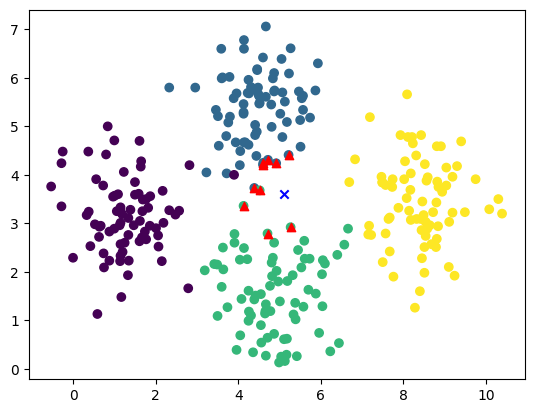

In [75]:
test_point = np.array([[5.1,3.6]])
_,idx = knc.kneighbors(test_point)
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(test_point[:,0],test_point[:,1],marker='x',c='blue')
plt.scatter(x[idx,0], x[idx,1], marker='^',c='red')
plt.show()

추천 : 두 사람을 비교하는 방법
  - 유사성 점수
    - 유클리스 점수 : 두 데이터 포인터 간의 유클리스 거리
      - 점수가 0 과 1사이 
      - 유클리드 거리가 크면 점수가 낮다(유사하지 않음)
    - 피어슨 점수 : 두 데이터 포인트 간의 상관관계를 측정
      - -1 과 1사이 1과 가까울수록 유사함
      - -1과 가까우면 유사하지 않음

In [76]:
import json
import argparse
import numpy as np

두 사용자간의 유클리드 거리 점수

In [79]:
# dataset  dictionary
def euclidean_score(dataset, user1,user2):
  if user1 not in dataset:
    raise TypeError(f"Cannot find {user1} in the dataset")
  if user2 not in dataset:
    raise TypeError(f"Cannot find {user2} in the dataset")
  common_movies={}
  #  두 사용자가 평가한 영화를 추출
  for item in dataset[user1]:
    if item in dataset[user2]:
      common_movies[item] = 1
  # 공통된 영화가 없으면 유사성 점수가 계산되지 않음
  if len(common_movies) == 0:
    return 0
  # 두 평점간의 제곱차이를 계산, 이를 이용해서 유클리드 점수를 계산
  squard_diff = []
  for item in dataset[user1]:
    if item in dataset[user2]:
      squard_diff.append( np.square(dataset[user1][item] - dataset[user2][item]) )

  return 1 / (np.sqrt(np.sum(squard_diff)) + 1)

In [80]:
# 피어슨 상관관계 계산 함수
def person_score(dataset,user1,user2):
  if user1 not in dataset:
    raise TypeError(f"Cannot find {user1} in the dataset")
  if user2 not in dataset:
    raise TypeError(f"Cannot find {user2} in the dataset")
  common_movies={}
  #  두 사용자가 평가한 영화를 추출
  for item in dataset[user1]:
    if item in dataset[user2]:
      common_movies[item] = 1
  # 공통된 영화가 없으면 유사성 점수가 계산되지 않음
  num_ratings = len(common_movies)
  if num_ratings == 0:
    return 0
  # 두 사용자가 평가한 모든 영화의 평점의 합
  user1_sum = np.sum([ dataset[user1][item] for item in common_movies ])
  user2_sum = np.sum([ dataset[user2][item] for item in common_movies ])
  # 두 사용자가 평가한 모든 영화의 평점의 제곱 합
  user1_squared_sum = np.sum([ np.square(dataset[user1][item]) for item in common_movies ])
  user2_squared_sum = np.sum([ np.square(dataset[user2][item]) for item in common_movies ])

  # 두 사용자가 평가한 모든 영화의 평점 곱의 합을 계산
  sum_of_products = np.sum([ dataset[user1][item]*dataset[user2][item] for item in common_movies])
  # 피어슨 상관관계 점수 계산
  Sxy = sum_of_products -  (user1_sum*user2_sum / num_ratings)
  Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
  Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
  # 편차가 없으면 점수는 0
  if Sxx * Syy == 0:
    return 0
  # 피어슨 점수를 반환
  return Sxy / np.sqrt(Sxx *Syy)

comute_score.py를 호출해서 argument값을 전달해서 유사도 계산

In [109]:
!python compute_score.py --user1 "David Smith" --user2 "Bill Duffy" --json-source '/content/rate_23.json' --score-type "eu"

Euclidean Score.....
0.585786437626905


In [88]:
import json
with open('./rate_23.json','r') as f:
  json.loads(f.read())